In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import missingno as msno
from scipy import stats

## Scraping date from website
### ***Don't rerun these cells, we made a csv so you can start from reading csv into dataframe***

In [42]:
page = requests.get('http://www.alltime-athletics.com/m_100ok.htm') # Make a get request to retrieve the page
soup = BeautifulSoup(page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing

In [43]:
soup.prettify

<bound method Tag.prettify of <html>
<head>
<meta content="100m, 100 meter, 100 metres, statistics" name="description"/>
<meta content="friidrott, friidrottsstatistik, track, field, athletics, sprints, running, marathon, high jump, long jump, triple jump, shot put, discus, javelin, hammer, pole vault, heptathlon, decahtlon, relay" name="keywords"/>
<title>Men's 100m</title>
</head>
<body alink="Blue" bgcolor="White" link="Green" vlink="Red">
<center><font face="Arial" size="2"><b><a href="http://www.alltime-athletics.com/index.html">
<img alt="Goto -&gt; Track &amp; Field all-time performances homepage" border="0" height="53" src="../pic/athletics50.jpg" width="295"/></a></b><br/>
<b> updated and maintained by<br/><strong><a class="sublink" href="javascript:tafmail('kl78vc','alltime-athletics.com')">Peter Larsson</a></strong><br/>
</b>
</font>
</center>
<p>
<td><a href="http://www.alltime-athletics.com/index.html">Back to main page</a></td><p><center>
<script language="JavaScript" type

In [44]:
table = soup.find('pre')
table

<pre>
        1      9.58       +0.9    Usain Bolt                     JAM     21.08.86    1      Berlin                        16.08.2009
        2      9.63       +1.5    Usain Bolt                     JAM     21.08.86    1      London                        05.08.2012
        3      9.69       ±0.0    Usain Bolt                     JAM     21.08.86    1      Beijing                       16.08.2008
        3      9.69       +2.0    Tyson Gay                      USA     09.08.82    1      Shanghai                      20.09.2009
        3      9.69       -0.1    Yohan Blake                    JAM     26.12.89    1      Lausanne                      23.08.2012
        6      9.71       +0.9    Tyson Gay                      USA     09.08.82    2      Berlin                        16.08.2009
        7      9.72       +1.7    Usain Bolt                     JAM     21.08.86    1rA    New York City                 31.05.2008
        7      9.72       +0.2    Asafa Powell                 

In [45]:
table_text = table.get_text()
table_text

"\n        1      9.58       +0.9    Usain Bolt                     JAM     21.08.86    1      Berlin                        16.08.2009\n        2      9.63       +1.5    Usain Bolt                     JAM     21.08.86    1      London                        05.08.2012\n        3      9.69       ±0.0    Usain Bolt                     JAM     21.08.86    1      Beijing                       16.08.2008\n        3      9.69       +2.0    Tyson Gay                      USA     09.08.82    1      Shanghai                      20.09.2009\n        3      9.69       -0.1    Yohan Blake                    JAM     26.12.89    1      Lausanne                      23.08.2012\n        6      9.71       +0.9    Tyson Gay                      USA     09.08.82    2      Berlin                        16.08.2009\n        7      9.72       +1.7    Usain Bolt                     JAM     21.08.86    1rA    New York City                 31.05.2008\n        7      9.72       +0.2    Asafa Powell             

## Extract times from table text

In [46]:
def get_times(table_text):
    times_mens = []
    
    for row in table_text.split('\n')[1:]:
        run_time = row[14:25].strip()
        run_time = run_time.rstrip('A')
        times_mens.append(run_time)
    
    return times_mens

In [47]:
winning_times = get_times(table_text)
display(winning_times[:5]) #display head of list
display(len(winning_times))

['9.58', '9.63', '9.69', '9.69', '9.69']

3365

In [48]:
def time_floats(data): #convert strings to floats
    lst = []
    for i in data:
        try:
            lst.append(float(i))
        except:
            lst.append(np.nan)
            
    return lst

In [49]:
mens_times = time_floats(winning_times)
display(mens_times[:5])
display(len(winning_times))


[9.58, 9.63, 9.69, 9.69, 9.69]

3365

## Extract dates from table text

In [50]:
def get_dates(table_text):
    date_mens = []
    
    for row in table_text.split('\n')[1:]:
        date = row[120:150].strip()
        date_mens.append(date)
    
    return date_mens

In [51]:
date = get_dates(table_text)
display(date[:5])
display(len(date))

['16.08.2009', '05.08.2012', '16.08.2008', '20.09.2009', '23.08.2012']

3365

## Extract Tail Wind from table text


In [52]:
def get_wind(table_text):
    wind_mens = []
    for row in table_text.split('\n')[1:]:
        wind = row[26:30].strip()
        if '-' in wind:
            wind_mens.append(wind)
        else:
            wind_mens.append(wind[1:])
            
    return wind_mens
    


In [53]:
tail_wind = get_wind(table_text)

display(tail_wind[:5])
display(len(tail_wind))

['0.9', '1.5', '0.0', '2.0', '-0.1']

3365

In [54]:
tw_floats = time_floats(tail_wind)

In [55]:
type(tw_floats[0])

float

## Extract D.O.B from table_text

In [56]:
def get_dob(table_text):
    dob_mens = []
    
    for row in table_text.split('\n')[1:]:
        dob = row[70:82].strip()
        dob_mens.append(dob)
    
    return dob_mens

In [57]:
dob = get_dob(table_text)
display(dob[:5])
display(len(dob))

['21.08.86', '21.08.86', '21.08.86', '09.08.82', '26.12.89']

3365

## Extract Country from table_text

In [58]:
def get_country(table_text):
    country_mens = []
    
    for row in table_text.split('\n')[1:]:
        country = row[60:70].strip()
        country_mens.append(country)
    
    return country_mens

In [59]:
countries = get_country(table_text)
display(countries[:5])
display(len(countries))

['JAM', 'JAM', 'JAM', 'USA', 'JAM']

3365

## Create Dataframe

In [60]:
runners = {'date': date, 'winning_times': mens_times, 'tail_wind': tw_floats, 'birth_date': dob, 'country': countries}

In [61]:
df = pd.DataFrame(runners)
df.head()

,date,winning_times,tail_wind,birth_date,country
0,16.08.2009,9.58,0.9,21.08.86,JAM
1,05.08.2012,9.63,1.5,21.08.86,JAM
2,16.08.2008,9.69,0.0,21.08.86,JAM
3,20.09.2009,9.69,2.0,09.08.82,USA
4,23.08.2012,9.69,-0.1,26.12.89,JAM


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 5 columns):
date             3365 non-null object
winning_times    3363 non-null float64
tail_wind        3355 non-null float64
birth_date       3365 non-null object
country          3365 non-null object
dtypes: float64(2), object(3)
memory usage: 131.6+ KB


In [63]:
df['date'] = pd.to_datetime(df['date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])


In [64]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 5 columns):
date             3363 non-null datetime64[ns]
winning_times    3363 non-null float64
tail_wind        3355 non-null float64
birth_date       3360 non-null datetime64[ns]
country          3365 non-null object
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 131.6+ KB


,date,winning_times,tail_wind,birth_date,country
0,2009-08-16,9.58,0.9,1986-08-21,JAM
1,2012-05-08,9.63,1.5,1986-08-21,JAM
2,2008-08-16,9.69,0.0,1986-08-21,JAM
3,2009-09-20,9.69,2.0,1982-09-08,USA
4,2012-08-23,9.69,-0.1,1989-12-26,JAM


In [65]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352 entries, 0 to 3362
Data columns (total 5 columns):
date             3352 non-null datetime64[ns]
winning_times    3352 non-null float64
tail_wind        3352 non-null float64
birth_date       3352 non-null datetime64[ns]
country          3352 non-null object
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 157.1+ KB


In [66]:
df.head()

,date,winning_times,tail_wind,birth_date,country
0,2009-08-16,9.58,0.9,1986-08-21,JAM
1,2012-05-08,9.63,1.5,1986-08-21,JAM
2,2008-08-16,9.69,0.0,1986-08-21,JAM
3,2009-09-20,9.69,2.0,1982-09-08,USA
4,2012-08-23,9.69,-0.1,1989-12-26,JAM


In [67]:
df['age']= df['date'] - df['birth_date']

In [68]:
df.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2009-08-16,9.58,0.9,1986-08-21,JAM,8396 days
2012-05-08,9.63,1.5,1986-08-21,JAM,9392 days
2008-08-16,9.69,0.0,1986-08-21,JAM,8031 days
2009-09-20,9.69,2.0,1982-09-08,USA,9874 days
2012-08-23,9.69,-0.1,1989-12-26,JAM,8276 days


In [68]:
df['age'] = df['age'].apply(lambda x: x.days)

In [71]:
df['age'] = df['age']/365

In [72]:
df = df.set_index('date')
df.head()

,date,winning_times,tail_wind,birth_date,country,age
0,2009-08-16,9.58,0.9,1986-08-21,JAM,23.002740
1,2012-05-08,9.63,1.5,1986-08-21,JAM,25.731507
2,2008-08-16,9.69,0.0,1986-08-21,JAM,22.002740
3,2009-09-20,9.69,2.0,1982-09-08,USA,27.052055
4,2012-08-23,9.69,-0.1,1989-12-26,JAM,22.673973


In [99]:
df['age'] = df['age'].apply(lambda x: x.days)
df['age'] = df['age']/365

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3352 entries, 2009-08-16 to 2019-09-28
Data columns (total 5 columns):
winning_times    3352 non-null float64
tail_wind        3352 non-null float64
birth_date       3352 non-null datetime64[ns]
country          3352 non-null object
age              3352 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 157.1+ KB


In [102]:
# saving scraped and cleaned data to csv and working from csv going forward 
# so that we don't have to repeatedly scrape the url

df.to_csv('mens_100m.csv')

## To run cells, start here with csv import 

In [88]:
data = pd.read_csv('mens_100m.csv', index_col='date')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3352 entries, 2009-08-16 to 2019-09-28
Data columns (total 5 columns):
winning_times    3352 non-null float64
tail_wind        3352 non-null float64
birth_date       3352 non-null object
country          3352 non-null object
age              3352 non-null float64
dtypes: float64(3), object(2)
memory usage: 157.1+ KB


In [89]:
data.index = pd.to_datetime(data.index)
data['birth_date'] = pd.to_datetime(data['birth_date'])

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3352 entries, 2009-08-16 to 2019-09-28
Data columns (total 5 columns):
winning_times    3352 non-null float64
tail_wind        3352 non-null float64
birth_date       3352 non-null datetime64[ns]
country          3352 non-null object
age              3352 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 157.1+ KB


In [91]:
data.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2009-08-16,9.58,0.9,1986-08-21,JAM,23.002740
2012-05-08,9.63,1.5,1986-08-21,JAM,25.731507
2008-08-16,9.69,0.0,1986-08-21,JAM,22.002740
2009-09-20,9.69,2.0,1982-09-08,USA,27.052055
2012-08-23,9.69,-0.1,1989-12-26,JAM,22.673973


## Poisson Process: looking at times under 9.8 seconds

In [92]:
fast = data['winning_times'] < 9.8 # create mask to retrieve winning times less than 9.8 seconds

In [93]:
fast_date = data[fast].index.min() #date first sub 9.8 second time was run

In [94]:
fast_date

Timestamp('1999-06-16 00:00:00')

In [95]:
# number of winning times under 9.8 seconds by year
by_year = data[fast].groupby(pd.Grouper(freq='A')).count()['winning_times']
by_year

date
1999-12-31    1
2000-12-31    0
2001-12-31    0
2002-12-31    0
2003-12-31    0
2004-12-31    0
2005-12-31    1
2006-12-31    2
2007-12-31    2
2008-12-31    7
2009-12-31    5
2010-12-31    3
2011-12-31    3
2012-12-31    8
2013-12-31    1
2014-12-31    1
2015-12-31    6
2016-12-31    0
2017-12-31    0
2018-12-31    1
2019-12-31    1
Freq: A-DEC, Name: winning_times, dtype: int64

In [96]:
low_by_year = np.array(by_year)

In [97]:
speed_era = data.index >= fast_date # all dates after first sub 9.8 time

In [98]:
data_fast = data[speed_era] # dataframe off all times after 9.8 seconds was first recorded
data_fast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2600 entries, 2009-08-16 to 2019-09-28
Data columns (total 5 columns):
winning_times    2600 non-null float64
tail_wind        2600 non-null float64
birth_date       2600 non-null datetime64[ns]
country          2600 non-null object
age              2600 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 121.9+ KB


In [99]:
under_dates = np.array(data[fast].index)
under_dates = np.sort(under_dates)

In [100]:
under_dates[:6] # note that sometimes sub 9.8 times were run on the same day (i.e. the 5th and 6th winning times in the array)

array(['1999-06-16T00:00:00.000000000', '2005-06-14T00:00:00.000000000',
       '2006-08-18T00:00:00.000000000', '2006-11-06T00:00:00.000000000',
       '2007-09-09T00:00:00.000000000', '2007-09-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [101]:
def time_delta(datetime_array): # getting time between sub 9.8 runs in days
    diff=[]
    for i, date in enumerate(datetime_array):
        if i==0:
            continue
        else:
            prior = np.datetime64(datetime_array[i - 1])
            current = np.datetime64(datetime_array[i])
            d = current - prior
            days = d.astype('timedelta64[D]')
            delta = days / np.timedelta64(1, 'D')

            try:
                diff.append(delta)
            except:
                continue
    return diff

In [102]:
days_between = time_delta(under_dates) 
days_between[:5]

[2190.0, 430.0, 80.0, 307.0, 0.0]

### Model time between rare events as exponential function

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


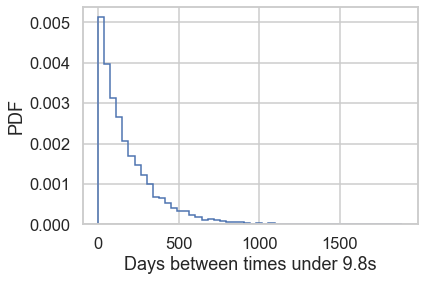

In [103]:
# if we assume that winning times under 9.8 seconds are described by a Poisson process, 
# then the time between times under 9.8s is exponentially distributed
# time is in unites of number of days between winning times under 9.8 seconds

# Compute mean days-between time: t
t = np.mean(days_between)

# Draw out of an exponential distribution with parameter t: days_between_time
days_between_time = np.random.exponential(t, 10000)

# Plot the PDF and label axes
_ = plt.hist(days_between_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Days between times under 9.8s')
_ = plt.ylabel('PDF')

### Compare the theoretical distribution created above with the empirical data

In [104]:
def ecdf(data):
    '''Compute ECDF for array of measurements'''
    # Number of data points: n
    n = len(data)
    
    # x-axis data for the ECDF: x
    x = np.sort(data)
    
    #y-axis data for the ECDF: y
    y = np.arange(1, n+1) / n # y data of ECDF go from 1/n to 1 in equally spaced increments
    
    return x, y

Text(0, 0.5, 'CDF')

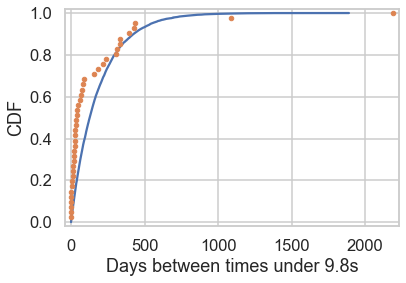

In [105]:
# Create an ECDF from real data: x, y
x,y = ecdf(days_between)
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(days_between_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Days between times under 9.8s')
plt.ylabel('CDF')

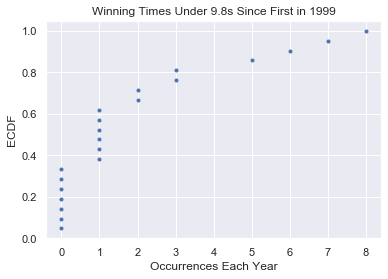

In [106]:
# Compute ECDF for run times under 9.8 seconds: x_low, y_low
sns.set()
x_low, y_low = ecdf(low_by_year)

# Generate plot
_ = plt.plot(x_low, y_low, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Occurrences Each Year')
_ = plt.ylabel('ECDF')
_ = plt.title('Winning Times Under 9.8s Since First in 1999')

## Understand whether data are normally distributed

In [107]:
win_times = np.array(data.winning_times)

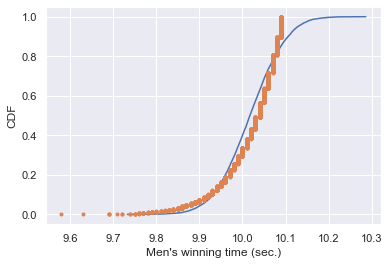

In [108]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(win_times)
sigma = np.std(win_times)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_times, y_times = ecdf(samples)
x, y = ecdf(win_times)

# Plot the CDFs and show the plot
_ = plt.plot(x_times, y_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel("Men's winning time (sec.)")
_ = plt.ylabel('CDF')

## Hypothesis Testing

### Hypothesis 1: Tailwind


$H_{0}$: The mean difference between treatment and control groups is zero. i.e. $\mu_{0} = \mu_{1}$

### Creating functions to calculate t-value

In [109]:
def sample_variance(sample):
    x_bar = np.mean(sample)
    diff = sample - x_bar
    sq_diff = diff**2
    n=len(sample) - 1
    
    return np.sum(sq_diff)/n

In [110]:
def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    s1 = sample_variance(sample1)
    s2 = sample_variance(sample2)
    return ((n1 - 1)*s1 + (n2 - 1)*s2) / (n1 + n2 - 2)

In [111]:
def twosample_tstatistic(expr, ctrl):
    expr_mean = np.mean(expr)
    ctrl_mean = np.mean(ctrl)
    var = pooled_variance(expr, ctrl)
    n_expr = len(expr)
    n_ctrl = len(ctrl)
    numerator = expr_mean - ctrl_mean
    denominator = np.sqrt(var*(1/n_expr + 1/n_ctrl))

    return numerator / denominator

In [112]:
data.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2009-08-16,9.58,0.9,1986-08-21,JAM,23.002740
2012-05-08,9.63,1.5,1986-08-21,JAM,25.731507
2008-08-16,9.69,0.0,1986-08-21,JAM,22.002740
2009-09-20,9.69,2.0,1982-09-08,USA,27.052055
2012-08-23,9.69,-0.1,1989-12-26,JAM,22.673973


In [113]:
length = len(data.index)
if length%2 == 0:
    h1 = int(length/2)
else:
    h1 = int(round(length/2))

In [114]:
by_times = data.sort_values(by='winning_times')

In [115]:
tw_expr = np.array(by_times.tail_wind)[:h1]

In [116]:
tw_ctrl = np.array(by_times.tail_wind)[h1:]

In [117]:
display(np.var(tw_expr))
display(np.var(tw_ctrl))

0.6433358312780174

0.8082119711951972

In [118]:
twosample_tstatistic(tw_expr, tw_ctrl)

2.5700227847864445

In [119]:
#critical t-value for alpha 0.05 and one tailed
stats.t.ppf(1-0.05, (len(tw_ctrl)+len(tw_expr)-2))

1.6453086099891936

In [120]:
display(np.mean(tw_expr))
display(np.mean(tw_ctrl))

0.6048329355608593

0.5291766109785202

In [121]:
stats.ttest_ind(tw_expr, tw_ctrl)

Ttest_indResult(statistic=2.5700227847864445, pvalue=0.010212035743735194)

In [122]:
data.index.min()

Timestamp('1964-10-15 00:00:00')

In [123]:
data.index.max()

Timestamp('2019-12-07 00:00:00')

In [124]:
by_date = data.sort_index()

In [125]:
dates = by_date.index
times = by_date.winning_times 

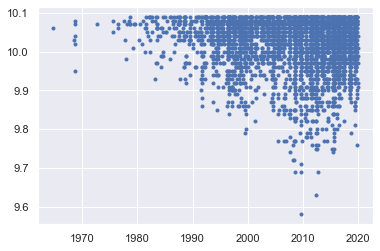

In [126]:
_= plt.plot(dates, times, marker='.', linestyle='none')

(array([   2.,    0.,    6.,   26.,   38.,  115.,  219.,  455.,  786.,
        1705.]),
 array([ 9.58 ,  9.631,  9.682,  9.733,  9.784,  9.835,  9.886,  9.937,
         9.988, 10.039, 10.09 ]),
 <a list of 10 Patch objects>)

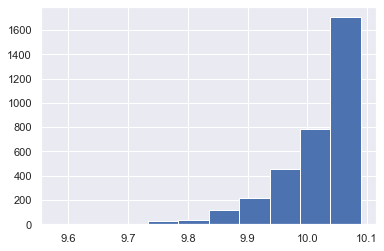

In [127]:
plt.hist(times)

In [128]:
by_date.index[h1] # 50% of the data divide

Timestamp('2009-11-06 00:00:00')

In [129]:
by_age = data.sort_values(by='age')

In [130]:
by_age = by_age[by_age['age'] > 0]

In [131]:
by_age.age.max()

40.1972602739726

In [132]:
by_age.age.min()

17.38082191780822

In [159]:
times_age = np.array(by_age.winning_times)
age = np.array(by_age.age)

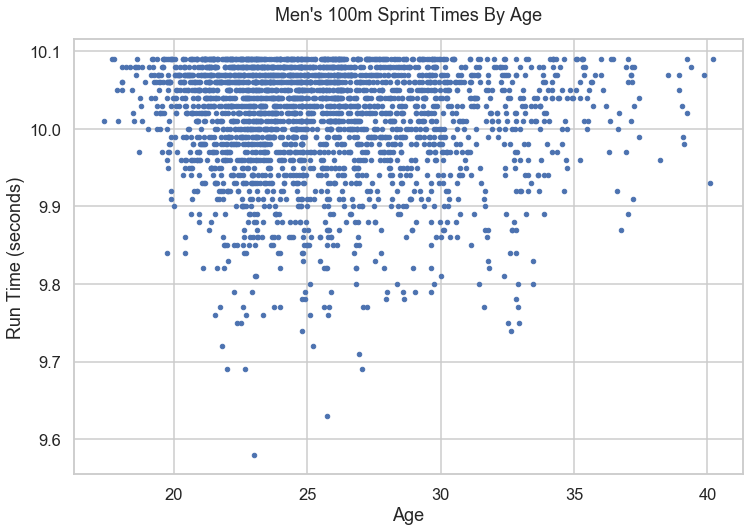

In [169]:
_=plt.figure(figsize=(12,8))
_=plt.plot(age, times_age, marker='.', linestyle='none')
_=plt.xlabel('Age')
_=plt.ylabel('Run Time (seconds)')
_=plt.title("Men's 100m Sprint Times By Age", y=1.03)

In [137]:
by_age.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2810 entries, 2013-04-28 to 2016-07-05
Data columns (total 5 columns):
winning_times    2810 non-null float64
tail_wind        2810 non-null float64
birth_date       2810 non-null datetime64[ns]
country          2810 non-null object
age              2810 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 131.7+ KB


In [138]:
# by_age.to_csv('df.csv')

In [139]:
by_age.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17.380822
2002-07-17,10.09,-0.6,1984-11-10,TTO,17.693151
2018-02-06,10.09,0.9,2000-05-09,USA,17.758904
2017-04-08,10.05,-0.6,1999-06-03,JPN,17.860274
2008-06-28,10.01,1.6,1990-08-01,USA,17.920548


In [140]:
by_age['clean_age'] = by_age.age.apply(lambda x: round(x,0))

In [141]:
by_age.head()

,winning_times,tail_wind,birth_date,country,age,clean_age
date,,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17.380822,17.0
2002-07-17,10.09,-0.6,1984-11-10,TTO,17.693151,18.0
2018-02-06,10.09,0.9,2000-05-09,USA,17.758904,18.0
2017-04-08,10.05,-0.6,1999-06-03,JPN,17.860274,18.0
2008-06-28,10.01,1.6,1990-08-01,USA,17.920548,18.0


In [142]:
min_by_age = by_age.groupby('clean_age')['winning_times'].min()
min_by_age

clean_age
17.0    10.01
18.0    10.01
19.0     9.97
20.0     9.84
21.0     9.82
22.0     9.69
23.0     9.58
24.0     9.77
25.0     9.72
26.0     9.63
27.0     9.69
28.0     9.78
29.0     9.78
30.0     9.79
31.0     9.80
32.0     9.77
33.0     9.74
34.0     9.89
35.0     9.92
36.0     9.97
37.0     9.87
38.0     9.96
39.0     9.98
40.0     9.93
Name: winning_times, dtype: float64

In [143]:
x = np.array(min_by_age.index)

In [144]:
y = np.array(min_by_age)

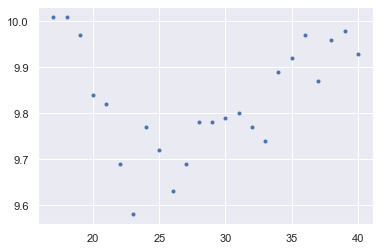

In [145]:
_=plt.plot(x, y, marker='.', linestyle='none')

In [146]:
min_age, max_age = int(x.min()), int(x.max())

In [147]:
by_age.count()

winning_times    2810
tail_wind        2810
birth_date       2810
country          2810
age              2810
clean_age        2810
dtype: int64

## Quadriatic equation: degree 2
### y = ax**2 + bx + c

In [148]:
poly_coefficients = np.polyfit(x,y,2)

In [149]:
poly_coefficients

array([ 2.15118577e-03, -1.19256719e-01,  1.13780215e+01])

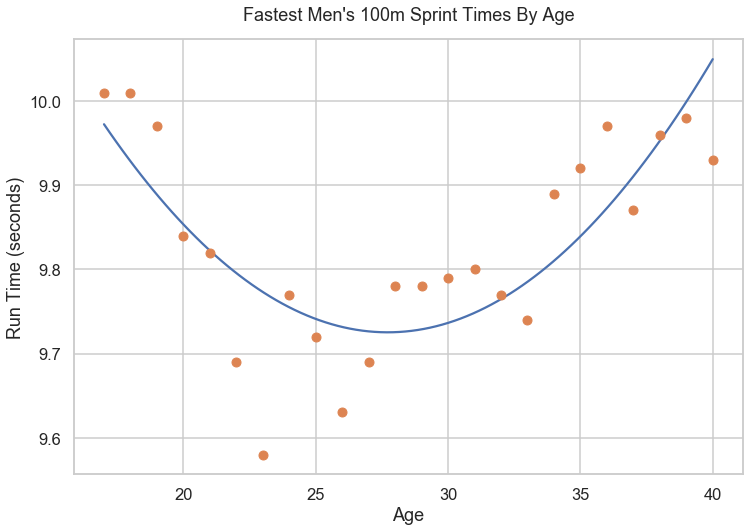

In [171]:
sns.set_style('whitegrid')
sns.set_context('talk')
x_new = np.linspace(min_age,max_age,100)
y_new = np.poly1d(poly_coefficients)
_=plt.figure(figsize = (12, 8))
_=plt.plot(x_new,y_new(x_new),x,y,'o')
_=plt.xlabel('Age')
_=plt.ylabel('Run Time (seconds)')
_=plt.title("Fastest Men's 100m Sprint Times By Age", y=1.03)

In [151]:
lowest_time = y_new(min_age)
best_age = min_age
for age in range(min_age,max_age):
    if lowest_time > y_new(age):
        lowest_time = y_new(age)
        best_age = age
    
print(f'minimum of best fit curve is time of {lowest_time} and age {best_age}. Therefore, we hypothesize optimal age range is 28+/-1 yr')

minimum of best fit curve is time of 9.725363043478266 and age 28. Therefore, we hypothesize optimal age range is 28+/-1 yr


In [152]:
#Ho: there is no difference in mean run time between age group 27-29 and other ages
#Ha: mean run time for age group 27-29 is lower than mean run time for other ages

In [153]:
other_ages = (by_age.age < 27) | (by_age.age > 29) #filter times for ages not 27-29

In [154]:
ctrl_ages = np.array(by_age[other_ages].winning_times)
len(ctrl_ages)

2501

In [155]:
target_ages = (by_age.age >=27) & (by_age.age <=29) # filter times for ages 27-29

In [156]:
expr_ages = np.array(by_age[target_ages].winning_times)
len(expr_ages)

309

In [157]:
#Welch's t-test
stats.ttest_ind(ctrl_ages, expr_ages, equal_var=False)

Ttest_indResult(statistic=1.2256981958196693, pvalue=0.22106171543260286)

### FTR null that there is a difference in mean run time between 27-29 and other age groups